# ***PakStockPredict: Stock Market Insight for smart strategic Investment***


# **Project Overview:**

The Pakistani stock market is significantly influenced by economic and political events, causing volatility that impacts investor decisions. This project, PakStockPredict, aims to create a data-driven system to assist investors in identifying profitable shares in the Pakistan Stock Exchange (PSX) by leveraging insights from economic indicators and political sentiment. By forecasting which shares are likely to perform well, PakStockPredict will provide valuable guidance for strategic investment decisions.

**Objectives**

To develop a machine learning model that predicts sectoral performance based on economic and political indicators.

To identify key economic and political variables that influence stock market trends in Pakistan.

To create a user-friendly system that allows investors to receive insights on which industries are likely to be profitable under current economic and political conditions.

**Project Domain:** Fintech

**Business Question**
1. Which industries are likely to experience growth or decline in the upcoming quarter based on economic and political indicators?
2. How can political events and news sentiment affect stock prices in the short term?
3. Which sectors are more resilient to economic downturns, and which are more vulnerable?
4. Can sentiment analysis of social media or news data reliably predict short-term stock movements in specific industries?
5. What are the optimal times of year for investing in specific sectors in Pakistan, based on seasonal trends and historical data?
6. How does currency fluctuation impact sector performance in the Pakistani stock market?
7. What investment strategy can provide maximum returns based on historical data and current economic and political conditions?


# **Data Collection:**

I downloaded the Pakistan Stock Market Shares Data from Kaggle.com (https://www.kaggle.com/datasets/mukhazarahmad/pakistan-stock-exchange-data-all-companies). Unfortunately, the dataset contains individual files for each company. Therefore, I compiled all the files into a single file named SymbolWiseSharesData1.csv. The code is provided below.

In [11]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/SymbolWiseData/'
dfs = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        file_name_without_extension = os.path.splitext(filename)[0]
        df['Symbol'] = file_name_without_extension

        date = pd.to_datetime(df['TIME'], errors='coerce', format='%b %d, %Y')
        df['MONTH'] = date.dt.month_name()
        df['YEAR'] = date.dt.year

        dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
merged_df.head(10)
output_file = '/content/drive/MyDrive/ConsolidatedShareData/SymbolWiseSharesdata1.csv'  # Replace with the desired output path
merged_df.to_csv(output_file, index=False)

print(f"All CSV files have been merged and saved to {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,Symbol,MONTH,YEAR
0,"Oct 9, 2020",26.10,28.50,26.10,27.70,1335000,waves,October,2020
1,"Oct 8, 2020",26.49,26.84,26.15,26.52,551500,waves,October,2020
2,"Oct 7, 2020",24.74,26.14,24.55,26.14,1089000,waves,October,2020
3,"Oct 6, 2020",23.85,24.48,23.25,24.32,616500,waves,October,2020
4,"Oct 5, 2020",25.00,25.00,23.20,23.39,808000,waves,October,2020
5,"Oct 2, 2020",26.40,27.10,25.00,25.08,1327000,waves,October,2020
6,"Oct 1, 2020",26.00,26.50,25.32,26.06,680500,waves,October,2020
7,"Sep 30, 2020",27.51,27.85,25.70,26.17,631000,waves,September,2020
8,"Sep 29, 2020",26.90,27.70,26.60,27.55,537000,waves,September,2020
9,"Sep 28, 2020",28.40,29.00,26.77,26.85,1130500,waves,September,2020


We need to obtain data on Pakistan government officials. Unfortunately, I couldn’t find the required information from any available data sources. However, I was able to collect data on election winners. Using this dataset, I compiled information on election years and winning parties.

In [12]:
# Install pyreadstat library (used to read .sav files)
!pip install pyreadstat

import pyreadstat
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Provide the path to your .sav file on Google Drive
sav_file_path = '/content/drive/MyDrive/ConsolidatedShareData/election-database-1970-2018.sav'

# Read the .sav file
df, meta = pyreadstat.read_sav(sav_file_path)

# Specify the path where you want to save the .csv file
csv_file_path = sav_file_path.replace('.sav', '.csv')

# Convert to .csv and save it to the same directory in Google Drive
df.to_csv(csv_file_path, index=False)
df.head(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 47.2 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,NA,final_alpha_District,division,Prov,zones_20,Regions_12,CandidateName,Votes,ValidVotes,RejectedVotes,Regd_Voters,Total_Votes,Turnout,turnout_n,Party,Merge_Party,Six_parties
0,1970.0,1.0,219.0,21.0,3.0,16.0,9.0,Khan Abdul Qayoom Khan,27215.0,91040.0,1388.0,148708.0,92428.0,62.0,62.154020,PML-Q,100.0,2.0
1,1970.0,1.0,219.0,21.0,3.0,16.0,9.0,Hayat Khan Sherpao,23981.0,NaN,NaN,NaN,NaN,NaN,NaN,PPP,105.0,1.0
2,1970.0,1.0,219.0,21.0,3.0,16.0,9.0,Arbab Sikandar Khan,21622.0,NaN,NaN,NaN,NaN,NaN,NaN,NAP-W,256.0,3.0
3,1970.0,1.0,219.0,21.0,3.0,16.0,9.0,Molana Abdul Qayoom Popalzai,13248.0,NaN,NaN,NaN,NaN,NaN,NaN,JUI-W.P,251.0,4.0
4,1970.0,1.0,219.0,21.0,3.0,16.0,9.0,Alfred Peter,2499.0,NaN,NaN,NaN,NaN,NaN,NaN,PML,259.0,6.0
5,1970.0,1.0,219.0,21.0,3.0,16.0,9.0,Hussain Ahmad Qazi,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,JI,52.0,4.0
6,1970.0,2.0,219.0,21.0,3.0,16.0,9.0,Ghulam Farooq,34402.0,85110.0,2010.0,154237.0,87120.0,56.0,56.484501,NAP-W,256.0,3.0
7,1970.0,2.0,219.0,21.0,3.0,16.0,9.0,Mian M.Jan,22529.0,NaN,NaN,NaN,NaN,NaN,NaN,JUI-W.P,251.0,4.0
8,1970.0,2.0,219.0,21.0,3.0,16.0,9.0,Noor M.Khan,13711.0,NaN,NaN,NaN,NaN,NaN,NaN,PML-Q,100.0,2.0
9,1970.0,2.0,219.0,21.0,3.0,16.0,9.0,Noor Akbar Khan,9491.0,NaN,NaN,NaN,NaN,NaN,NaN,PPP,105.0,1.0


In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

input_file = '/content/drive/MyDrive/ConsolidatedShareData/PakistanElectionWinningData.csv'
output_file = '/content/drive/MyDrive/ConsolidatedShareData/PakistanElectionWinningDataUpdated.csv'

# Step 1: Read the original CSV file into a DataFrame
df = pd.read_csv(input_file)
df = df.dropna(subset=['Votes'])
# Step 2: Group by both 'Year' and 'NA' and get the candidate with the highest votes
winning_candidates = df.loc[df.groupby(['Year', 'NA'])['Votes'].idxmax()]

# Step 3: Save the result to a new CSV file
winning_candidates[['Year', 'NA', 'CandidateName', 'Votes', 'Party']].to_csv(output_file, index=False)

# Print a success message
print(f"Winning candidates data has been saved to {output_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Winning candidates data has been saved to /content/drive/MyDrive/ConsolidatedShareData/PakistanElectionWinningDataUpdated.csv


In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
input_file = '/content/drive/MyDrive/ConsolidatedShareData/PakistanElectionWinningDataUpdated.csv'
df = pd.read_csv(input_file)

# Group by 'Year' and 'Party' to count the number of seats (occurrences of each party in each year)
seats_count = df.groupby(['Year', 'Party']).size().reset_index(name='Seats')

# Find the party with the most seats for each year
max_seats_per_year = seats_count.loc[seats_count.groupby('Year')['Seats'].idxmax()]

# Save the result to a new CSV file
max_seats_per_year.to_csv('/content/drive/MyDrive/ConsolidatedShareData/PakistanElectionWinningParties.csv', index=False)

# Print the result
print(max_seats_per_year)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Year                       Party  Seats
8    1970                         PPP     79
12   1977                         PPP    155
23   1988                         PPP     93
27   1990                         IJI    104
54   1993                         PPP     88
62   1997                      PML(N)    135
78   2002  Pakistan Muslim League(QA)     75
89   2008                      PML(N)    110
105  2013                      PML(N)    131
124  2018                         PTI    114


We now need to obtain economic data for Pakistan, which we retrieved from the IMF website. Unfortunately, the data was not in the required format. Therefore, I applied some manual logic and created the dataset provided below.

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
EcnData = pd.read_csv('/content/drive/MyDrive/EnocmicalData/PakistanEcnonomicalDataFrom1980Updated.csv')
EcnData.head(50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,Real GDP growth (Annual percent change),"GDP, current prices (Billions of U.S. dollars)","GDP per capita, current prices (U.S. dollars per capita)","GDP, current prices (Purchasing power parity; billions of international dollars)","GDP per capita, current prices (Purchasing power parity; international dollars per capita)","GDP based on PPP, share of world (Percent of World)",Implied PPP conversion rate (National currency per international dollar),"Inflation rate, average consumer prices (Annual percent change)","Inflation rate, end of period consumer prices (Annual percent change)",...,Extensive Margin (Index),Intensive Margin (Index),Export Diversification Index (Index),Direct Investment Abroad (Millions of US Dollars),Direct Investment In Country (Millions of US Dollars),Private Inflows excluding Direct Investment (Millions of US Dollars),Private Inflows excluding Direct Investment (% of GDP) (Percent),DEBT (% of GDP),"Private debt, loans and debt securities (Percent of GDP)",Net lending/borrowing (also referred as overall balance) (% of GDP)
0,1980.0,6.9,38.616,479.064,74.903,929.237,0.566,5.104,11.9,15.1,...,0.768159,2.431903,3.200062,NaN,NaN,NaN,NaN,54.25,14.865013,NaN
1,1981.0,6.2,45.681,550.438,87.079,1049.267,0.589,5.193,11.9,10.4,...,0.683139,2.469045,3.152184,NaN,NaN,NaN,NaN,48.21,14.972288,NaN
2,1982.0,7.6,49.932,584.379,99.452,1163.930,0.630,5.299,5.9,3.8,...,0.699957,2.232535,2.932492,NaN,NaN,NaN,NaN,54.89,15.302211,NaN
3,1983.0,6.8,46.619,530.372,110.362,1255.545,0.656,5.367,6.4,8.8,...,0.638208,2.261601,2.899809,NaN,NaN,NaN,NaN,54.56,16.523770,NaN
4,1984.0,4.0,50.612,560.154,118.888,1315.803,0.653,5.740,6.1,3.4,...,0.674179,2.098511,2.772690,NaN,NaN,NaN,NaN,54.24,16.738150,NaN
5,1985.0,8.7,50.607,545.174,133.328,1436.289,0.685,5.757,5.6,5.0,...,0.782382,2.235785,3.018167,NaN,NaN,NaN,NaN,60.19,19.201467,NaN
6,1986.0,6.4,51.827,543.594,144.666,1517.359,0.706,5.782,3.5,4.7,...,0.790683,2.283320,3.074003,NaN,NaN,NaN,NaN,69.98,20.586449,NaN
7,1987.0,5.8,54.171,553.482,156.866,1602.741,0.719,5.933,4.7,4.7,...,0.777156,2.355454,3.132610,NaN,NaN,NaN,NaN,72.08,19.105653,NaN
8,1988.0,6.4,62.385,621.142,172.850,1721.006,0.733,6.352,8.8,10.8,...,0.798174,2.380495,3.178669,NaN,NaN,NaN,NaN,72.92,18.224479,NaN
9,1989.0,4.8,65.042,631.367,188.265,1827.516,0.742,6.638,7.9,5.5,...,0.826115,2.416012,3.242128,NaN,NaN,NaN,NaN,75.48,17.239298,NaN


# **Merging Data**

Below code involves preparing and merging three datasets Symbol-wise Stock Data, Election Data, and Economic Data—to create a unified dataset for the PakStockPredict project. The goal is to consolidate these diverse data sources into a single dataset based on the Year column for further analysis and prediction.

In [18]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File paths for the datasets
shares_data_path = '/content/drive/MyDrive/ConsolidatedShareData/SymbolWiseSharesdata1.csv'
election_data_path = '/content/drive/MyDrive/ConsolidatedShareData/PakistanElectionWinningParties.csv'
economics_data_path = '/content/drive/MyDrive/EnocmicalData/PakistanEcnonomicalDataFrom1980Updated.csv'

# Load the datasets
shares_data = pd.read_csv(shares_data_path)
election_data = pd.read_csv(election_data_path)
economics_data = pd.read_csv(economics_data_path)

# Ensure 'YEAR' column is numeric in shares_data and election_data
shares_data['YEAR'] = pd.to_numeric(shares_data['YEAR'], errors='coerce')
election_data['Year'] = pd.to_numeric(election_data['Year'], errors='coerce')

# Handle NaN in economics_data 'Year' column
economics_data = economics_data.dropna(subset=['Year'])  # Drop rows with NaN in 'Year'
economics_data['Year'] = economics_data['Year'].astype(int)  # Convert to integer

# Rename columns to have consistent names for merging
election_data.rename(columns={'Year': 'YEAR'}, inplace=True)
economics_data.rename(columns={'Year': 'YEAR'}, inplace=True)

# Merge the datasets
merged_data = shares_data.merge(election_data, on='YEAR', how='left') \
                         .merge(economics_data, on='YEAR', how='left')

# Save the merged dataset to a CSV file
output_file_path = '/content/drive/MyDrive/ConsolidatedShareData/FinalMergedDataset.csv'
merged_data.to_csv(output_file_path, index=False)

# Display the first few rows of the merged dataset
print("Merged dataset preview:")
print(merged_data.head())

print(f"Merged dataset has been saved to {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Merged dataset preview:
          TIME   OPEN   HIGH    LOW  CLOSE   VOLUME Symbol    MONTH  YEAR  \
0  Oct 9, 2020  26.10  28.50  26.10  27.70  1335000  waves  October  2020   
1  Oct 8, 2020  26.49  26.84  26.15  26.52   551500  waves  October  2020   
2  Oct 7, 2020  24.74  26.14  24.55  26.14  1089000  waves  October  2020   
3  Oct 6, 2020  23.85  24.48  23.25  24.32   616500  waves  October  2020   
4  Oct 5, 2020  25.00  25.00  23.20  23.39   808000  waves  October  2020   

  Party  ...  Extensive Margin (Index)  Intensive Margin (Index)  \
0   NaN  ...                       NaN                       NaN   
1   NaN  ...                       NaN                       NaN   
2   NaN  ...                       NaN                       NaN   
3   NaN  ...                       NaN                       NaN   
4   NaN  ...                       NaN      

# **Exploratory Data Analysis/Visualization**

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 1781 to 8649
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  410 non-null    float64
 1   NA                    410 non-null    float64
 2   final_alpha_District  410 non-null    float64
 3   division              410 non-null    float64
 4   Prov                  410 non-null    float64
 5   zones_20              410 non-null    float64
 6   Regions_12            410 non-null    float64
 7   CandidateName         410 non-null    object 
 8   Votes                 410 non-null    float64
 9   ValidVotes            410 non-null    float64
 10  RejectedVotes         410 non-null    float64
 11  Regd_Voters           410 non-null    float64
 12  Total_Votes           410 non-null    float64
 13  Turnout               410 non-null    float64
 14  turnout_n             410 non-null    float64
 15  Party     

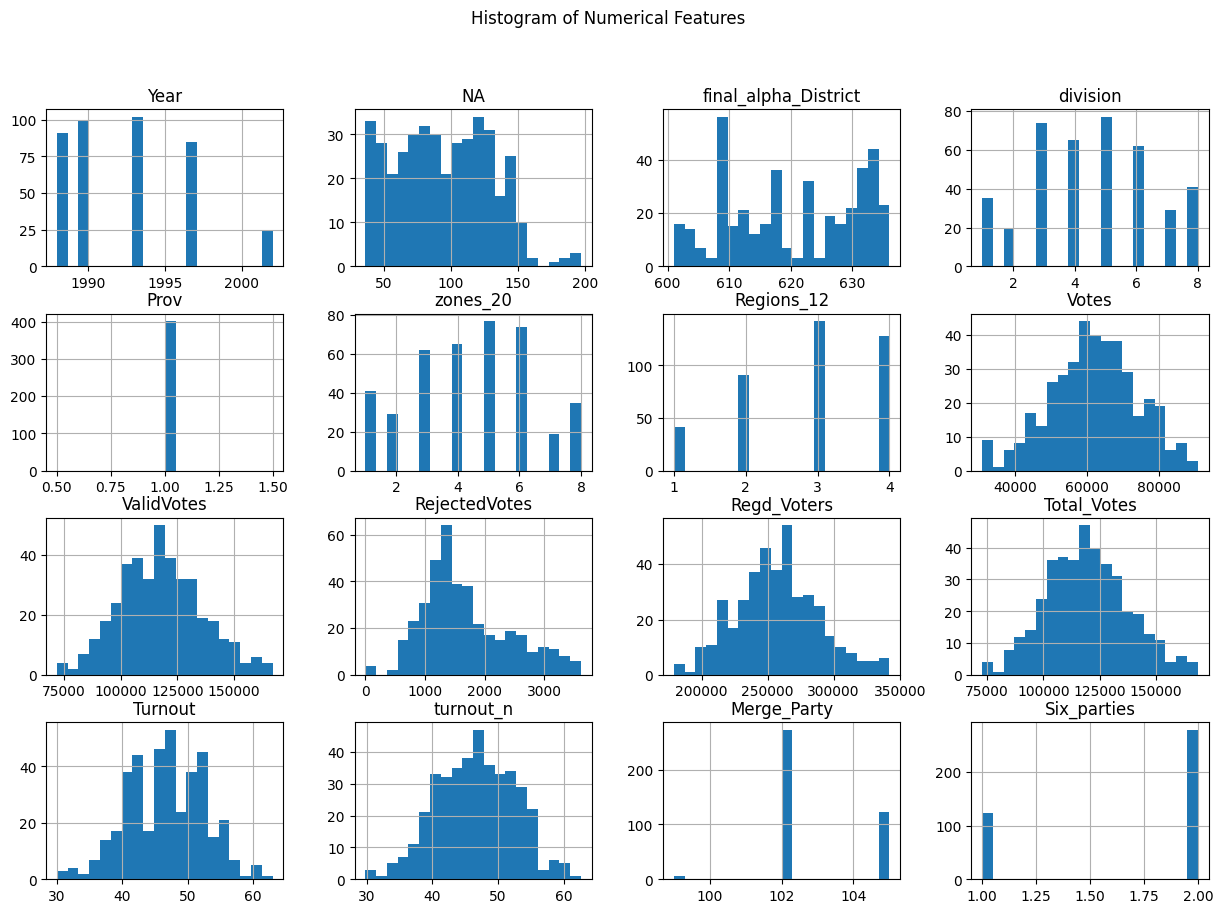

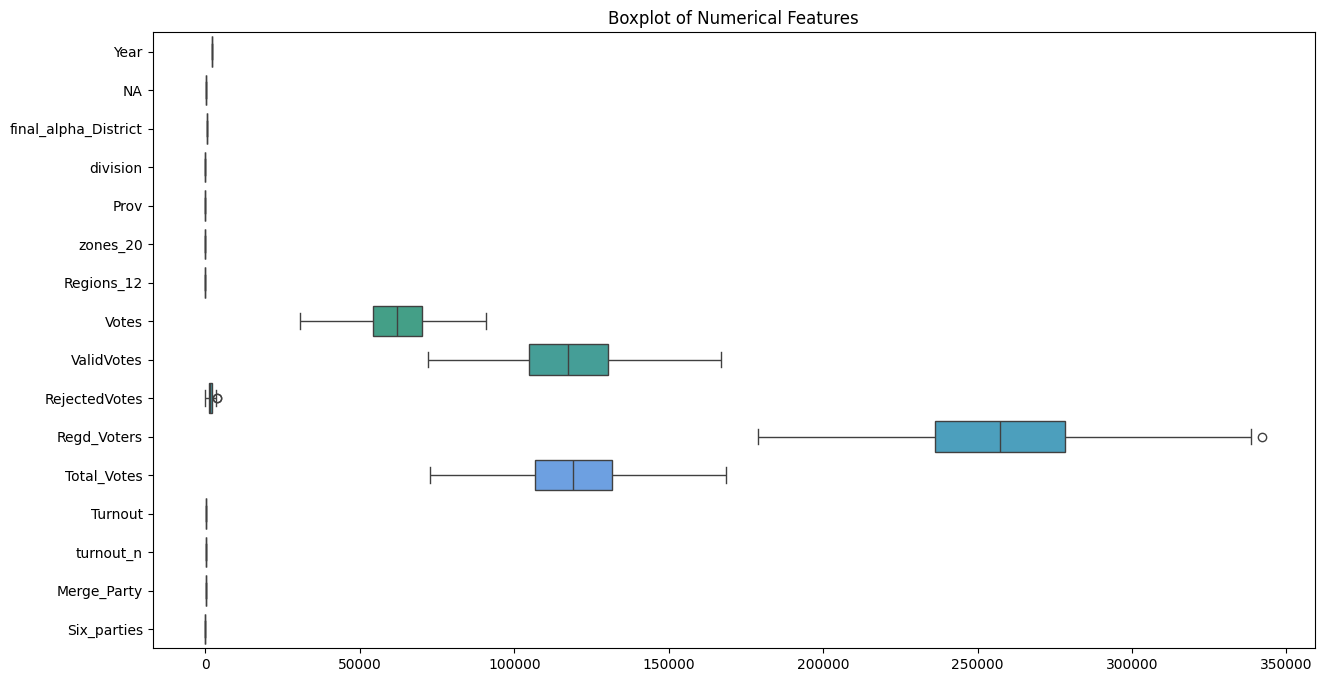

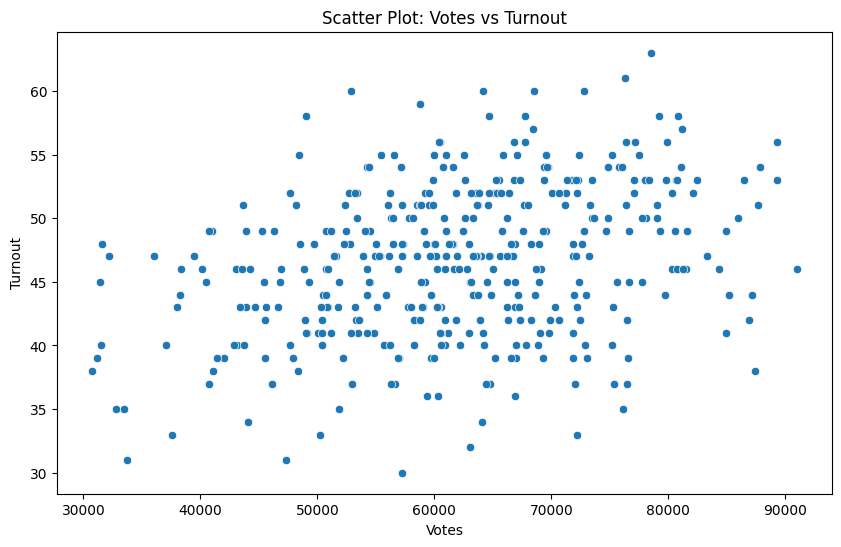

Numeric columns: Index(['Year', 'NA', 'final_alpha_District', 'division', 'Prov', 'zones_20',
       'Regions_12', 'Votes', 'ValidVotes', 'RejectedVotes', 'Regd_Voters',
       'Total_Votes', 'Turnout', 'turnout_n', 'Merge_Party', 'Six_parties'],
      dtype='object')


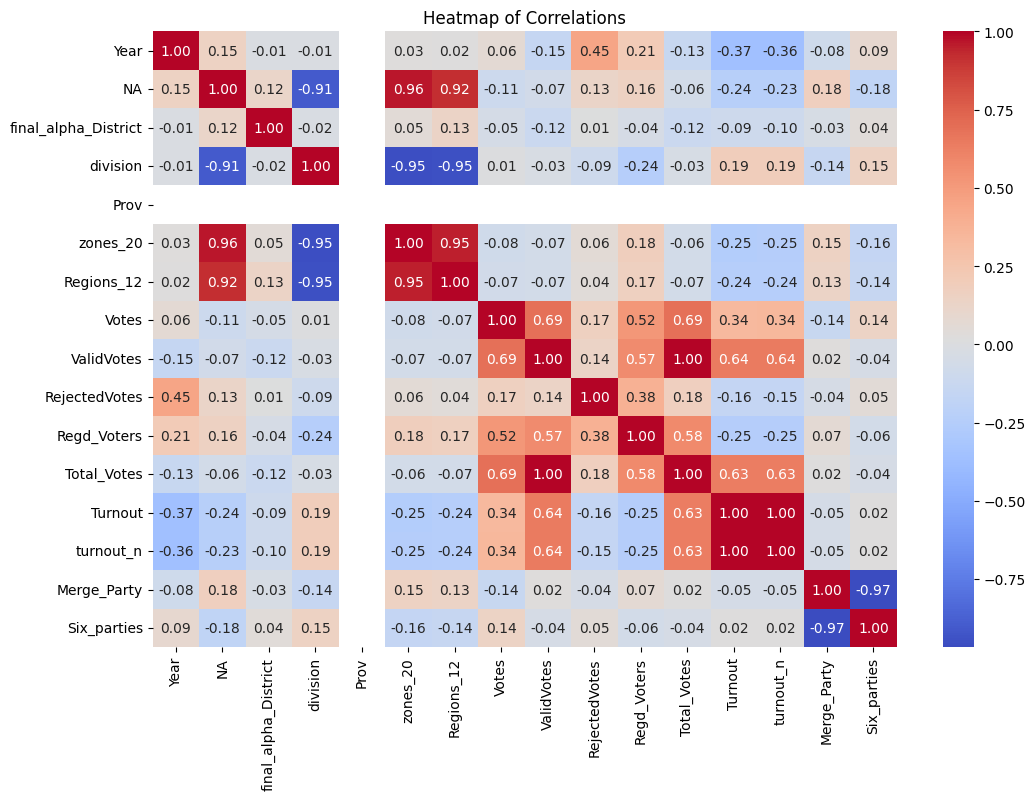

Cleaned dataset saved as 'Cleaned_FinalMergeDataSet.csv'


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

FinalMergedDataset = '/content/drive/MyDrive/ConsolidatedShareData/FinalMergedDataset.csv'
shares_data = pd.read_csv(FinalMergedDataset)

print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

#Handling Missing or Null Values
print("\nMissing Values:")
print(df.isnull().sum())

#Drop missing values
df = df.dropna()

#Fill missing values with mean/median (example for numerical columns)


#Detecting and Removing Outliers
# Example: Using IQR (Interquartile Range)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#Visualizing the Data
# Histogram
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

# Box Plot for Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns], orient="h")
plt.title('Boxplot of Numerical Features')
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Votes',  # Replace with your chosen column
    y='Turnout',  # Replace with your chosen column
    data=df
)
plt.title('Scatter Plot: Votes vs Turnout')
plt.xlabel('Votes')
plt.ylabel('Turnout')
plt.show()


# Heatmap for Correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Confirm numeric columns
print("Numeric columns:", numeric_df.columns)

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()

#Export Cleaned Data
df.to_csv('Cleaned_FinalMergeDataSet.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_FinalMergeDataSet.csv'")


# **Apply Machine Learning on MergeDataSet**

***Linear Regression***

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['Turnout'], errors='ignore')
y = df['Turnout']

X = X.drop(columns=['CandidateName'], errors='ignore')

X = pd.get_dummies(X)

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R-squared: {r2:.2f}")



Linear Regression - Mean Squared Error: 0.08
Linear Regression - R-squared: 1.00
